In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Refer to README.md file to load the dataset.

In [3]:
DATASET_NAME = 'RGBDS-160K'

In [8]:
df = pd.read_csv(os.path.join(dataset_mount_folder, 'labels.csv'))

In [9]:
df.shape

(168223, 39)

In [10]:
# total number of scan folders/children
scans_path = os.path.join(dataset_mount_folder, 'scans')
print(scans_path)
scans_f = os.listdir(scans_path)
len(scans_f)

/tmp/tmpkj1sgfzq/scans


12253

In [12]:
df.rename(columns={'age_rgb': 'age'}, inplace=True)
df['Years'] = df.apply(convert_age_from_days_to_years, axis=1)
df.head()

,file_path_depth,timestamp_depth,scan_id,scan_step_depth,scan_version_depth,height_depth,weight_depth,muac_depth,order_number,format_depth,artifact_depth,artifact_id_depth,device_model_depth,person_id_depth,age_depth,sex_depth,no_of_person_depth,pose_score,pose_result,ord_depth,format_temp_depth,file_path_rgb,timestamp_rgb,scan_step_rgb,scan_version_rgb,height_rgb,weight_rgb,muac_rgb,format_rgb,artifact_rgb,artifact_id_rgb,device_model_rgb,person_id_rgb,age,sex_rgb,no_of_person_rgb,ord_rgb,format_temp_rgb,rgbds_file_path,Years
0,1678302496361/9de66fb3-84f8-485b-8dff-614b0c98...,2023-03-08-19-08-16-369441,a3f096c0-bde4-11ed-8a41-cb112a2c7c43,100,v1.2.0,94.0,12.1,14.5,1,depth,94b77e80-bde4-11ed-8a41-97bb3b5af730,a3f096c1-bde4-11ed-8a41-8bf2692602c9,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.956885,"{'bbox_coordinates': [(281.436, 131.32458), (6...",1,depth,1678302497402/6a5c0ed3-d695-4132-91e2-100c9b44...,2023-03-08-19-08-17-416341,100,v1.2.0,94.0,12.1,14.5,rgb,9557b620-bde4-11ed-8a41-f703c978b592,a3f52aa0-bde4-11ed-8a41-b761b9620398,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,1,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
1,1678302496608/beebb80d-7e48-4b61-ba35-5acc67f5...,2023-03-08-19-08-16-619376,a3f096c0-bde4-11ed-8a41-cb112a2c7c43,100,v1.2.0,94.0,12.1,14.5,3,depth,94dda420-bde4-11ed-8a41-7b94095c98a4,a3f096c3-bde4-11ed-8a41-bb4f3700aa18,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.952167,"{'bbox_coordinates': [(299.18857, 112.45647), ...",3,depth,1678302497538/40d889b6-5e85-49f0-b1ae-3ec9d7ed...,2023-03-08-19-08-17-557003,100,v1.2.0,94.0,12.1,14.5,rgb,956d12e0-bde4-11ed-8a41-5b706c7281f3,a3f52aa1-bde4-11ed-8a41-33337f68e139,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,3,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
2,1678302496707/83705cf7-eed6-4958-900d-fcc6bf52...,2023-03-08-19-08-16-713158,a3f096c0-bde4-11ed-8a41-cb112a2c7c43,100,v1.2.0,94.0,12.1,14.5,4,depth,94ece660-bde4-11ed-8a41-cbc33a6adc19,a3f096c4-bde4-11ed-8a41-176fb453c369,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.951684,"{'bbox_coordinates': [(296.33044, 130.69958), ...",4,depth,1678302497662/f8e08494-235b-4aa1-84bb-edc98f68...,2023-03-08-19-08-17-666280,100,v1.2.0,94.0,12.1,14.5,rgb,957ddbc0-bde4-11ed-8a41-bb8713e93427,a3f52aa2-bde4-11ed-8a41-9bda3f06379f,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,4,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
3,1678302516152/3a8e1ca8-a600-454d-890b-4a72ba00...,2023-03-08-19-08-36-166583,a44609c0-bde4-11ed-8a41-bba95c956b72,102,v1.2.0,94.0,12.1,14.5,4,depth,a084bc00-bde4-11ed-8a41-d7b97ef25e78,a44609c1-bde4-11ed-8a41-0f4effbe3225,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,2,0.926973,"{'bbox_coordinates': [(230.46027, 78.713684), ...",4,depth,1678302517105/e88e93a5-2ef2-4e61-b132-f8f5a83f...,2023-03-08-19-08-37-119834,102,v1.2.0,94.0,12.1,14.5,rgb,a115b160-bde4-11ed-8a41-879a84a95fdc,a44609ca-bde4-11ed-8a41-d3b55e4bf9a4,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,2,4,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
4,1678302516335/5ad5edef-65a4-47b7-b4d7-af417484...,2023-03-08-19-08-36-338460,a44609c0-bde4-11ed-8a41-bba95c956b72,102,v1.2.0,94.0,12.1,14.5,6,depth,a09eaca0-bde4-11ed-8a41-9b6ad7e2fe07,a44609c3-bde4-11ed-8a41-4b6fd33c95d3,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.814440,"{'bbox_coordinates': [(361.18195, 64.576485), ...",6,depth,1678302517429/b3839e69-1b13-4a16-98aa-efb3241d...,2023-03-08-19-08-37-447947,102,v1.2.0,94.0,12.1,14.5,rgb,a1480c00-bde4-11ed-8a41-3b80b957b659,a44609cc-bde4-11ed-8a41-175094ef64af,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,6,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4


In [13]:
df.head()

,file_path_depth,timestamp_depth,scan_id,scan_step_depth,scan_version_depth,height_depth,weight_depth,muac_depth,order_number,format_depth,artifact_depth,artifact_id_depth,device_model_depth,person_id_depth,age_depth,sex_depth,no_of_person_depth,pose_score,pose_result,ord_depth,format_temp_depth,file_path_rgb,timestamp_rgb,scan_step_rgb,scan_version_rgb,height_rgb,weight_rgb,muac_rgb,format_rgb,artifact_rgb,artifact_id_rgb,device_model_rgb,person_id_rgb,age,sex_rgb,no_of_person_rgb,ord_rgb,format_temp_rgb,rgbds_file_path,Years
0,1678302496361/9de66fb3-84f8-485b-8dff-614b0c98...,2023-03-08-19-08-16-369441,a3f096c0-bde4-11ed-8a41-cb112a2c7c43,100,v1.2.0,94.0,12.1,14.5,1,depth,94b77e80-bde4-11ed-8a41-97bb3b5af730,a3f096c1-bde4-11ed-8a41-8bf2692602c9,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.956885,"{'bbox_coordinates': [(281.436, 131.32458), (6...",1,depth,1678302497402/6a5c0ed3-d695-4132-91e2-100c9b44...,2023-03-08-19-08-17-416341,100,v1.2.0,94.0,12.1,14.5,rgb,9557b620-bde4-11ed-8a41-f703c978b592,a3f52aa0-bde4-11ed-8a41-b761b9620398,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,1,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
1,1678302496608/beebb80d-7e48-4b61-ba35-5acc67f5...,2023-03-08-19-08-16-619376,a3f096c0-bde4-11ed-8a41-cb112a2c7c43,100,v1.2.0,94.0,12.1,14.5,3,depth,94dda420-bde4-11ed-8a41-7b94095c98a4,a3f096c3-bde4-11ed-8a41-bb4f3700aa18,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.952168,"{'bbox_coordinates': [(299.18857, 112.45647), ...",3,depth,1678302497538/40d889b6-5e85-49f0-b1ae-3ec9d7ed...,2023-03-08-19-08-17-557003,100,v1.2.0,94.0,12.1,14.5,rgb,956d12e0-bde4-11ed-8a41-5b706c7281f3,a3f52aa1-bde4-11ed-8a41-33337f68e139,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,3,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
2,1678302496707/83705cf7-eed6-4958-900d-fcc6bf52...,2023-03-08-19-08-16-713158,a3f096c0-bde4-11ed-8a41-cb112a2c7c43,100,v1.2.0,94.0,12.1,14.5,4,depth,94ece660-bde4-11ed-8a41-cbc33a6adc19,a3f096c4-bde4-11ed-8a41-176fb453c369,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.951684,"{'bbox_coordinates': [(296.33044, 130.69958), ...",4,depth,1678302497662/f8e08494-235b-4aa1-84bb-edc98f68...,2023-03-08-19-08-17-666280,100,v1.2.0,94.0,12.1,14.5,rgb,957ddbc0-bde4-11ed-8a41-bb8713e93427,a3f52aa2-bde4-11ed-8a41-9bda3f06379f,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,4,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
3,1678302516152/3a8e1ca8-a600-454d-890b-4a72ba00...,2023-03-08-19-08-36-166583,a44609c0-bde4-11ed-8a41-bba95c956b72,102,v1.2.0,94.0,12.1,14.5,4,depth,a084bc00-bde4-11ed-8a41-d7b97ef25e78,a44609c1-bde4-11ed-8a41-0f4effbe3225,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,2,0.926973,"{'bbox_coordinates': [(230.46027, 78.713684), ...",4,depth,1678302517105/e88e93a5-2ef2-4e61-b132-f8f5a83f...,2023-03-08-19-08-37-119834,102,v1.2.0,94.0,12.1,14.5,rgb,a115b160-bde4-11ed-8a41-879a84a95fdc,a44609ca-bde4-11ed-8a41-d3b55e4bf9a4,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,2,4,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
4,1678302516335/5ad5edef-65a4-47b7-b4d7-af417484...,2023-03-08-19-08-36-338460,a44609c0-bde4-11ed-8a41-bba95c956b72,102,v1.2.0,94.0,12.1,14.5,6,depth,a09eaca0-bde4-11ed-8a41-9b6ad7e2fe07,a44609c3-bde4-11ed-8a41-4b6fd33c95d3,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.814440,"{'bbox_coordinates': [(361.18195, 64.576485), ...",6,depth,1678302517429/b3839e69-1b13-4a16-98aa-efb3241d...,2023-03-08-19-08-37-447947,102,v1.2.0,94.0,12.1,14.5,rgb,a1480c00-bde4-11ed-8a41-3b80b957b659,a44609cc-bde4-11ed-8a41-175094ef64af,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,6,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4


In [14]:
# Total number of artifacts
print(f"Total Number of artifacts: {len(df['artifact_id_depth'])}")
print(f"Total Number of scans: {len(df.groupby('scan_id'))}")

Total Number of artifacts: 168223
Total Number of scans: 22870


In [15]:
# sample rgbds_file_path
sample_file = df['rgbds_file_path'][0]
print(sample_file)

/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/100/pc_a3f096c0-bde4-11ed-8a41-cb112a2c7c43_2023-03-08-19-08-16-369441_100_1.p


## Sample file

In [18]:
# sample scan
sample_scan = scans_f[0]
print(f'sample_scan: {sample_scan}')
print(os.listdir(scans_path + '/' + sample_scan))
f = scans_path + '/' + sample_scan + '/' + '102'
print(f"sample filepath: {f}")
print(os.listdir(f))

f_path = f + '/' + os.listdir(f)[0]
print(f_path)

sample_scan: 00035b60-beed-11ed-8a41-539a7b95f736
['102']
sample filepath: /tmp/tmp_50u34u9/scans/00035b60-beed-11ed-8a41-539a7b95f736/102
['pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-17-386939_102_1.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-17-558821_102_2.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-17-652620_102_3.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-17-808819_102_4.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-17-980799_102_5.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-18-183826_102_6.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-18-340168_102_7.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-18-496329_102_8.p', 'pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-18-683917_102_9.p']
/tmp/tmp_50u34u9/scans/00035b60-beed-11ed-8a41-539a7b95f736/102/pc_0004e201-beed-11ed-8a41-a7a3dcec0268_2023-03-10-02-40-17-386939_102_1.p


In [19]:

depthmaps, target = pickle.load(open(f_path, "rb"))

In [20]:
# depthmaps is a list of 3 npz arrays (Depthmap, RGB, segment)
depth, rgb, segment = depthmaps
# depthmaps[0].shape, depthmaps[1].shape, depthmaps[2].shape
print(f"Shape of Depthmap: {depth.shape}, RGB: {rgb.shape}, segment map: {segment.shape}")

Shape of Depthmap: (240, 180, 1), RGB: (240, 180, 3), segment map: (240, 180, 1)


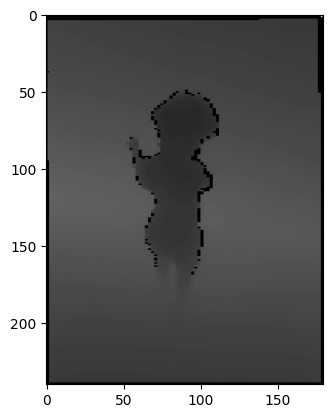

In [21]:
_ = plt.imshow(np.squeeze(depth), cmap='gray')
plt.show()

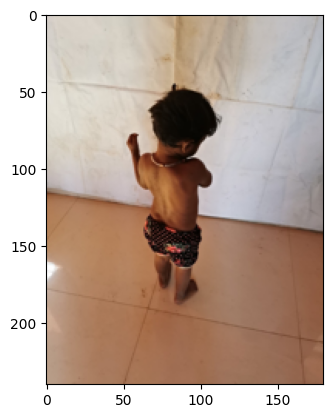

In [22]:
_ = plt.imshow(np.squeeze(rgb), cmap='gray')
plt.show()

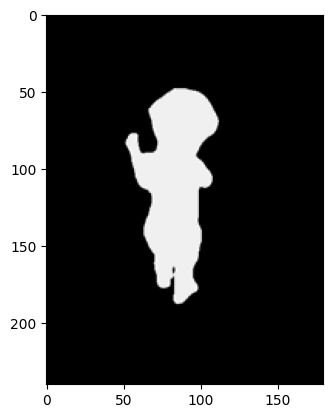

In [23]:
_ = plt.imshow(np.squeeze(segment), cmap='gray')
plt.show()

In [24]:

target

{'file_path_depth': '1678416017375/4316cc3c-abb1-4e66-ba4f-659ad5f89f24',
 'timestamp_depth': '2023-03-10-02-40-17-386939',
 'scan_id': '0004e201-beed-11ed-8a41-a7a3dcec0268',
 'scan_step_depth': 102,
 'scan_version_depth': 'v1.2.1',
 'height_depth': 84.3,
 'weight_depth': 11.1,
 'muac_depth': 14.8,
 'order_number': 1,
 'format_depth': 'depth',
 'artifact_depth': 'e4847a40-beec-11ed-8a41-bf1bddff5f16',
 'artifact_id_depth': '0004e202-beed-11ed-8a41-b708ab4dd55f',
 'device_model_depth': 'HUAWEI VOG-L29',
 'person_id_depth': '00035b60-beed-11ed-8a41-539a7b95f736',
 'age_depth': 1036,
 'sex_depth': 'female',
 'no_of_person_depth': '1',
 'pose_score': '0.87541586',
 'pose_result': "{'bbox_coordinates': [(317.5191, 273.61072), (679.6566, 1125.1053)], 'bbox_confidence_score': [0.9990601], 'key_points_coordinate': [{'nose': {'x': 513.64795, 'y': 489.943}}, {'left_eye': {'x': 491.4736, 'y': 489.943}}, {'right_eye': {'x': 491.4736, 'y': 484.3994}}, {'left_ear': {'x': 458.2121, 'y': 645.1633}}, 

## Analysis

In [25]:
print("Total no. of artifacts:", len(df))
unique_scan_ids = df.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = df.drop_duplicates(subset='person_id_depth', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 168223
Total no. of unique scan ids: 22870
Total no. of unique person ids: 12253


device_model_depth
HUAWEI VOG-L29    168223
Name: count, dtype: int64


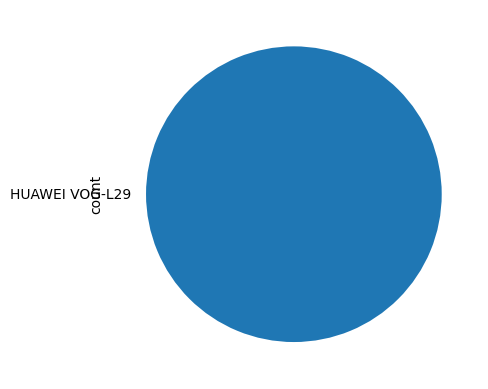

In [26]:
print(df['device_model_depth'].value_counts())
_ = df['device_model_depth'].value_counts().plot(kind='pie')
# device_model_depth

scan_version_depth
v1.2.0    74729
v0.8      71489
v1.2.1    21168
v0.9        837
Name: count, dtype: int64


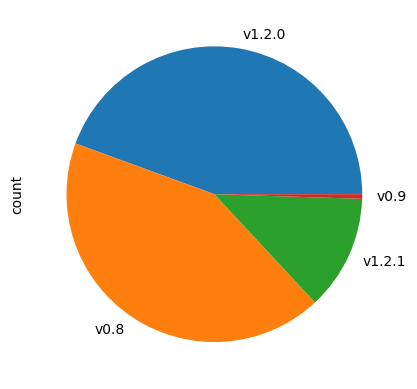

In [27]:
print(df['scan_version_depth'].value_counts())
_ = df['scan_version_depth'].value_counts().plot(kind='pie')

Years
0    1341
1    2760
2    2519
3    2788
4    2833
5      12
Name: count, dtype: int64


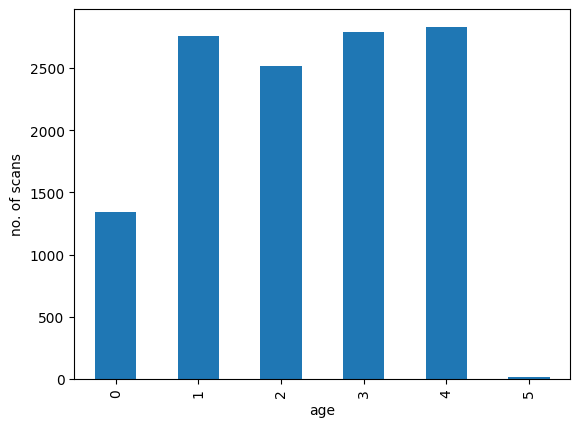

In [29]:
draw_age_distribution(unique_person_ids)

Years
0    2432
1    5060
2    4744
3    5181
4    5431
5      22
Name: count, dtype: int64


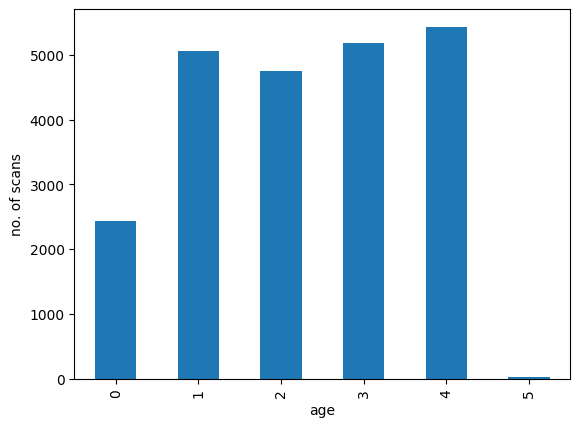

In [30]:
draw_age_distribution(unique_scan_ids)

scan_step_rgb
102    88089
100    42233
202    25682
200    12219
Name: count, dtype: int64


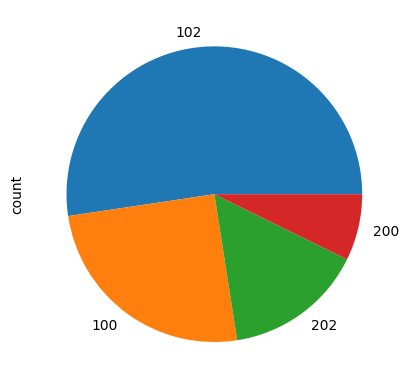

In [31]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df['scan_step_rgb'].value_counts())
_ = df['scan_step_rgb'].value_counts().plot(kind='pie')

In [32]:

scan_type_colname = 'scan_step_depth' # for other datasets this can be "key"
calculate_code_age_distribution(df, scan_type_colname)

2023-07-04 18:23:11,263 - INFO - scan_step_depth - /mnt/batch/tasks/shared/LS_root/mounts/clusters/rbanka2/code/Users/rbanka/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
100,369,4054,9910,12916,14910
102,840,10050,23044,26277,27761
202,10848,13902,692,174,66
200,5274,6505,340,62,38


### Analysis based on Age (>2 and <2)

In [19]:
df.columns

Index(['file_path_depth', 'timestamp_depth', 'scan_id', 'scan_step_depth',
       'scan_version_depth', 'height_depth', 'weight_depth', 'muac_depth',
       'order_number', 'format_depth', 'artifact_depth', 'artifact_id_depth',
       'device_model_depth', 'person_id_depth', 'age_depth', 'sex_depth',
       'no_of_person_depth', 'pose_score', 'pose_result', 'ord_depth',
       'format_temp_depth', 'file_path_rgb', 'timestamp_rgb', 'scan_step_rgb',
       'scan_version_rgb', 'height_rgb', 'weight_rgb', 'muac_rgb',
       'format_rgb', 'artifact_rgb', 'artifact_id_rgb', 'device_model_rgb',
       'person_id_rgb', 'age', 'sex_rgb', 'no_of_person_rgb', 'ord_rgb',
       'format_temp_rgb', 'rgbds_file_path', 'Years'],
      dtype='object')

In [17]:
# get dataframe with age > 2
df_gt2 = df[df['age']>=731]
print(f"Total Number of artifacts for age > 2: {len(df_gt2['artifact_id_depth'])}")
print(f"Total Number of scans for age > 2: {len(df_gt2.groupby('scan_id'))}")

# get dataframe with age < 2
df_lt2 = df[~(df['age'] >= 731)]
print(f"Total Number of artifacts for age < 2: {len(df_lt2['artifact_id_depth'])}")
print(f"Total Number of scans for age < 2: {len(df_lt2.groupby('scan_id'))}")

Total Number of artifacts for age > 2: 116201
Total Number of scans for age > 2: 15351
Total Number of artifacts for age < 2: 52022
Total Number of scans for age < 2: 7519


#### scan type for age > 2

102    77100
100    37764
202      906
200      431
Name: scan_step_depth, dtype: int64


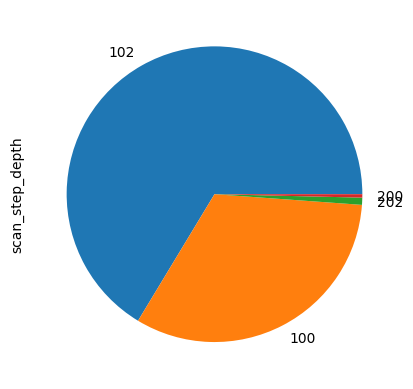

In [22]:
## keys for different scan type and their distribution in dataframe with "age" > 2
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df_gt2['scan_step_depth'].value_counts())
_ = df_gt2['scan_step_depth'].value_counts().plot(kind='pie')

#### scan type for age < 2

202    24776
200    11788
102    10989
100     4469
Name: scan_step_depth, dtype: int64


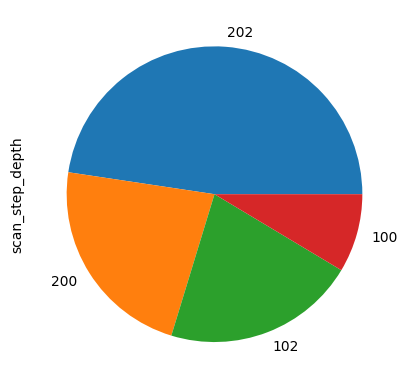

In [20]:
## keys for different scan type and their distribution in dataframe with "age" < 2
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df_lt2['scan_step_depth'].value_counts())
_ = df_lt2['scan_step_depth'].value_counts().plot(kind='pie')

In [26]:
df_gt2['pose_score'] = df_gt2['pose_score'].apply(lambda x: float(x))
df_gt2_new = df_gt2[(df_gt2['pose_score'] > 0.90) & (df_gt2['no_of_person_depth'] == 1)]
print(f"Total Number of artifacts for age > 2, pose_score > 0.90, no_of_person == 1: {len(df_gt2_new['artifact_id_depth'])}")
print(f"Total Number of scans for age > 2, pose_score > 0.90, no_of_person == 1: {len(df_gt2_new.groupby('scan_id'))}")

Total Number of artifacts for age > 2, pose_score > 0.90, no_of_person == 1: 48422
Total Number of scans for age > 2, pose_score > 0.90, no_of_person == 1: 9060


/tmp/ipykernel_2721595/3668851405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gt2['pose_score'] = df_gt2['pose_score'].apply(lambda x: float(x))


### Distribution of height, weight and age against each other

In [33]:
unique_scan_ids.head()

,file_path_depth,timestamp_depth,scan_id,scan_step_depth,scan_version_depth,height_depth,weight_depth,muac_depth,order_number,format_depth,artifact_depth,artifact_id_depth,device_model_depth,person_id_depth,age_depth,sex_depth,no_of_person_depth,pose_score,pose_result,ord_depth,format_temp_depth,file_path_rgb,timestamp_rgb,scan_step_rgb,scan_version_rgb,height_rgb,weight_rgb,muac_rgb,format_rgb,artifact_rgb,artifact_id_rgb,device_model_rgb,person_id_rgb,age,sex_rgb,no_of_person_rgb,ord_rgb,format_temp_rgb,rgbds_file_path,Years
0,1678302496361/9de66fb3-84f8-485b-8dff-614b0c98...,2023-03-08-19-08-16-369441,a3f096c0-bde4-11ed-8a41-cb112a2c7c43,100,v1.2.0,94.0,12.10,14.5,1,depth,94b77e80-bde4-11ed-8a41-97bb3b5af730,a3f096c1-bde4-11ed-8a41-8bf2692602c9,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,0.956885,"{'bbox_coordinates': [(281.436, 131.32458), (6...",1,depth,1678302497402/6a5c0ed3-d695-4132-91e2-100c9b44...,2023-03-08-19-08-17-416341,100,v1.2.0,94.0,12.10,14.5,rgb,9557b620-bde4-11ed-8a41-f703c978b592,a3f52aa0-bde4-11ed-8a41-b761b9620398,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,1,1,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
3,1678302516152/3a8e1ca8-a600-454d-890b-4a72ba00...,2023-03-08-19-08-36-166583,a44609c0-bde4-11ed-8a41-bba95c956b72,102,v1.2.0,94.0,12.10,14.5,4,depth,a084bc00-bde4-11ed-8a41-d7b97ef25e78,a44609c1-bde4-11ed-8a41-0f4effbe3225,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,2,0.926973,"{'bbox_coordinates': [(230.46027, 78.713684), ...",4,depth,1678302517105/e88e93a5-2ef2-4e61-b132-f8f5a83f...,2023-03-08-19-08-37-119834,102,v1.2.0,94.0,12.10,14.5,rgb,a115b160-bde4-11ed-8a41-879a84a95fdc,a44609ca-bde4-11ed-8a41-d3b55e4bf9a4,HUAWEI VOG-L29,a33b0260-bde4-11ed-8a41-eb5160648f52,1621,male,2,4,rgb,/scans/a33b0260-bde4-11ed-8a41-eb5160648f52/10...,4
10,1678302482035/04fd29d7-9f65-419d-bec4-ec6c4db5...,2023-03-08-19-08-02-041051,b2340461-bde4-11ed-8a41-37d93c79fcf1,102,v1.2.0,87.2,10.65,13.5,1,depth,8c2e6f80-bde4-11ed-8a41-7b1c58c92363,b2340462-bde4-11ed-8a41-2b46946f850e,HUAWEI VOG-L29,b2327dc0-bde4-11ed-8a41-637e8d01fddf,1436,female,1,0.829091,"{'bbox_coordinates': [(225.95929, 172.3179), (...",1,depth,1678302483415/32254416-9a1c-416b-8fef-88b6e97e...,2023-03-08-19-08-03-431717,102,v1.2.0,87.2,10.65,13.5,rgb,8d028860-bde4-11ed-8a41-4fc8c7ecc881,b23711a7-bde4-11ed-8a41-83767ab57ff4,HUAWEI VOG-L29,b2327dc0-bde4-11ed-8a41-637e8d01fddf,1436,female,1,1,rgb,/scans/b2327dc0-bde4-11ed-8a41-637e8d01fddf/10...,3
19,1678302548367/6c2356a4-9464-41de-aa7c-63a6ff00...,2023-03-08-19-09-08-370242,d21d92a0-bde4-11ed-8a41-f728dd25706b,100,v1.2.0,108.0,15.50,15.3,1,depth,b3b79720-bde4-11ed-8a41-fbc71ebb69a0,d21d92a1-bde4-11ed-8a41-73031eceeb88,HUAWEI VOG-L29,d158bc00-bde4-11ed-8a41-d3cae0d8d46a,1687,male,1,0.964283,"{'bbox_coordinates': [(366.73215, 48.13661), (...",1,depth,1678302549396/3a20b98e-311c-41b4-ae4a-8743989d...,2023-03-08-19-09-09-417129,100,v1.2.0,108.0,15.50,15.3,rgb,b4564820-bde4-11ed-8a41-43f3ca222b04,d21f1947-bde4-11ed-8a41-0780132a4a51,HUAWEI VOG-L29,d158bc00-bde4-11ed-8a41-d3cae0d8d46a,1687,male,1,1,rgb,/scans/d158bc00-bde4-11ed-8a41-d3cae0d8d46a/10...,4
28,1678302593463/6071e492-b029-463e-a3f6-346db388...,2023-03-08-19-09-53-464761,d2a9f420-bde4-11ed-8a41-c77bc6ef2f78,102,v1.2.0,108.0,15.50,15.3,1,depth,ce9ad480-bde4-11ed-8a41-437687b25383,d2a9f421-bde4-11ed-8a41-23e40b3a9d47,HUAWEI VOG-L29,d158bc00-bde4-11ed-8a41-d3cae0d8d46a,1687,male,1,0.907072,"{'bbox_coordinates': [(321.20856, 142.6661), (...",1,depth,1678302594652/7e9fe334-3519-4c77-ba41-a2644480...,2023-03-08-19-09-54-667923,102,v1.2.0,108.0,15.50,15.3,rgb,cf4ee240-bde4-11ed-8a41-ebedaad878c5,d2ab7ac0-bde4-11ed-8a41-b34ecdc24f85,HUAWEI VOG-L29,d158bc00-bde4-11ed-8a41-d3cae0d8d46a,1687,male,1,1,rgb,/scans/d158bc00-bde4-11ed-8a41-d3cae0d8d46a/10...,4


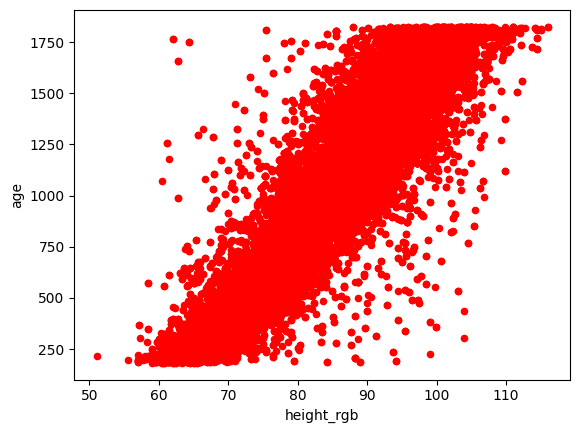

In [34]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height_rgb', y='age', c='red')

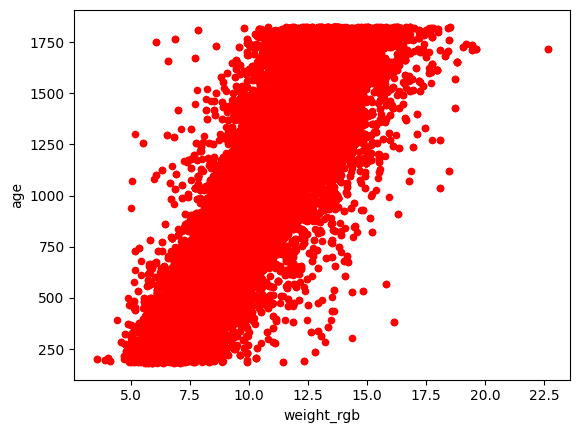

In [35]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight_rgb', y='age', c='red')

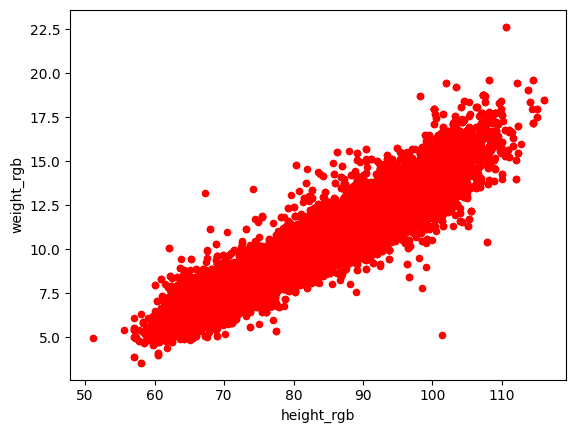

In [36]:
weight_vs_height = unique_scan_ids.plot.scatter(x='height_rgb', y='weight_rgb', c='red')

### Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [37]:
df.describe()

,scan_step_depth,height_depth,weight_depth,muac_depth,order_number,age_depth,no_of_person_depth,pose_score,ord_depth,scan_step_rgb,height_rgb,weight_rgb,muac_rgb,age,no_of_person_rgb,ord_rgb,Years
count,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000,168223.000000
mean,123.882834,85.398114,10.644495,13.770588,5.074068,1045.867485,1.064165,0.826735,5.074068,123.882834,85.398114,10.644495,13.770588,1045.867485,1.064165,5.074068,2.335144
std,41.790115,11.501880,2.585019,1.042657,2.760318,482.801211,0.307876,0.151807,2.760318,41.790115,11.501880,2.585019,1.042657,482.801211,0.307876,2.760318,1.329151
min,100.000000,51.100000,3.550000,9.000000,1.000000,183.000000,1.000000,0.034143,1.000000,100.000000,51.100000,3.550000,9.000000,183.000000,1.000000,1.000000,0.000000
25%,100.000000,76.500000,8.600000,13.100000,3.000000,620.000000,1.000000,0.799430,3.000000,100.000000,76.500000,8.600000,13.100000,620.000000,1.000000,3.000000,1.000000
50%,102.000000,86.500000,10.700000,13.700000,5.000000,1076.000000,1.000000,0.860335,5.000000,102.000000,86.500000,10.700000,13.700000,1076.000000,1.000000,5.000000,2.000000
75%,102.000000,94.700000,12.550000,14.500000,7.000000,1469.000000,1.000000,0.927279,7.000000,102.000000,94.700000,12.550000,14.500000,1469.000000,1.000000,7.000000,4.000000
max,202.000000,116.000000,22.650000,18.500000,27.000000,1825.000000,10.000000,0.978780,27.000000,202.000000,116.000000,22.650000,18.500000,1825.000000,10.000000,27.000000,5.000000


In [38]:
unique_scan_ids.describe()

,scan_step_depth,height_depth,weight_depth,muac_depth,order_number,age_depth,no_of_person_depth,pose_score,ord_depth,scan_step_rgb,height_rgb,weight_rgb,muac_rgb,age,no_of_person_rgb,ord_rgb,Years
count,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.00000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.00000,22870.000000,22870.000000
mean,124.701530,84.806336,10.519988,13.741220,2.000394,1021.755969,1.08815,0.823596,2.000394,124.701530,84.806336,10.519988,13.741220,1021.755969,1.08815,2.000394,2.270442
std,42.443183,11.453290,2.574119,1.041953,2.094879,480.944673,0.36015,0.169675,2.094879,42.443183,11.453290,2.574119,1.041953,480.944673,0.36015,2.094879,1.326137
min,100.000000,51.100000,3.550000,9.000000,1.000000,183.000000,1.00000,0.044619,1.000000,100.000000,51.100000,3.550000,9.000000,183.000000,1.00000,1.000000,0.000000
25%,100.000000,75.700000,8.500000,13.100000,1.000000,598.000000,1.00000,0.799222,1.000000,100.000000,75.700000,8.500000,13.100000,598.000000,1.00000,1.000000,1.000000
50%,102.000000,85.500000,10.500000,13.700000,1.000000,1031.500000,1.00000,0.868104,1.000000,102.000000,85.500000,10.500000,13.700000,1031.500000,1.00000,1.000000,2.000000
75%,102.000000,94.100000,12.400000,14.400000,2.000000,1440.000000,1.00000,0.937393,2.000000,102.000000,94.100000,12.400000,14.400000,1440.000000,1.00000,2.000000,3.000000
max,202.000000,116.000000,22.650000,18.500000,19.000000,1825.000000,7.00000,0.977747,19.000000,202.000000,116.000000,22.650000,18.500000,1825.000000,7.00000,19.000000,5.000000


#### 1) Check age

In [39]:
find_outliers(df, 'age', '<365/2', data_id_name='person_id_depth')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [40]:
find_outliers(df, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [41]:

find_outliers(df, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

#### 2) Check weight

In [42]:
find_outliers(df, 'weight_rgb', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight_rgb<5.0
No. of outliers: 40


['835f1240-bdf0-11ed-8a41-67329b09a63c',
 '8579b4e0-bdf0-11ed-8a41-83e2a6084c06',
 'c64c8d20-bdfb-11ed-8a41-57ea66391fc7',
 'c8459e00-bdfb-11ed-8a41-4783b63273fc',
 'eb639161-bdfd-11ed-8a41-4702e1b2fed2',
 'ec0cf0c0-bdfd-11ed-8a41-cf2651bc59c8',
 '563b4600-be11-11ed-8a41-f7571c004303',
 '8f890b60-be14-11ed-8a41-770627253bb6',
 '9033f160-be14-11ed-8a41-5716ce42d137',
 'e22bcd00-be17-11ed-8a41-8b9f0f90d764',
 'e2ffe5e0-be17-11ed-8a41-47408d4ac94d',
 '7c9f0e60-be3b-11ed-8a41-6bcba0d34b49',
 '1aa78240-be50-11ed-8a41-bff213eadc4e',
 'd47d5520-be53-11ed-8a41-5f47f14b56fa',
 'd2a14221-be53-11ed-8a41-7f5355002ea6',
 '11431b81-be5d-11ed-8a41-cffcdfdee540',
 '12dd91a0-be5d-11ed-8a41-03bab14e2418',
 'cfcc8101-be84-11ed-8a41-dfe93b21597e',
 'd1ebb780-be84-11ed-8a41-2b3754de592b',
 'd23731e0-bea4-11ed-8a41-17f5aa03b767',
 'd2c39360-bea4-11ed-8a41-c3f9757d6620',
 'a39b4ac0-bea8-11ed-8a41-332aaf70bb6b',
 'c324b501-bf13-11ed-8a41-eb1e6581bd0f',
 '81dc1740-bf5a-11ed-8a41-a34e5ed8a888',
 '3669d780-bf6d-

In [43]:
find_outliers(df, 'weight_rgb', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight_rgb>30.0
No. of outliers: 0


[]

#### 3) Check height

In [44]:
find_outliers(df, 'height_rgb', '<40.0', data_id_name='scan_id')

Running the following query: @df.height_rgb<40.0
No. of outliers: 0


[]

In [45]:
find_outliers(df, 'height_rgb', '>150.0', data_id_name='scan_id')

Running the following query: @df.height_rgb>150.0
No. of outliers: 0


[]

In [27]:
# now close the mount context
mount_ctx.stop()